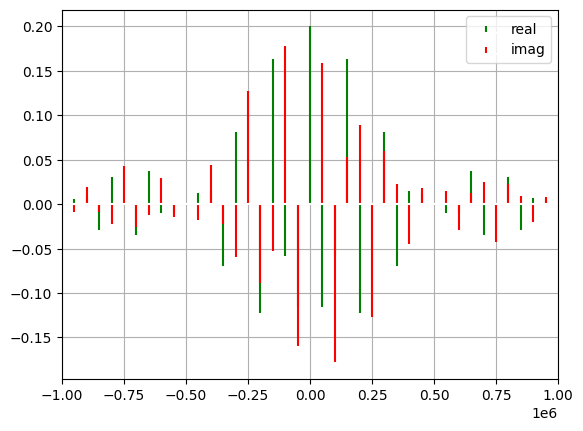

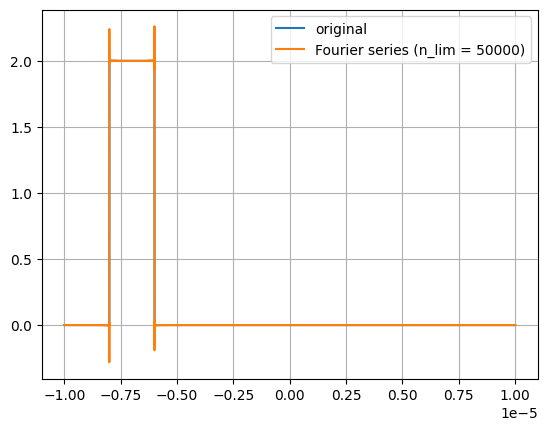

In [65]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from fourier import *

tau = 2e-6
# set up time domain
halfNt = 50000
Nt = 2*halfNt # ensure even
t_min = -10e-6
t_max = 10e-6
t, timestep = np.linspace(t_min, t_max, Nt, retstep = True)

# Voltage in time domain
u_0 = 2
t0 = -7e-6
# rectangular with period 2*tau and width tau
u_t = rectangle(t, u_0, tau, t0)
#u_t = np.sin(2*np.pi*t/tau)

omega0, period, omegas, cn = fourier_coefficients(u_t, t_min, t_max, Nt)
freqs = omegas/(2*np.pi)

# syntesis
u_syn = np.zeros_like(t)
#print(cn.size)
n_max = cn.size/2   # is int because Nt is even
ns = np.arange(-n_max, n_max+1)
twoj_pi_t_over_p = 2j*np.pi*t/period
n_lim = min(500000, n_max)
for n, c in zip(ns, cn):
    if abs(n) <= n_lim:
        # print(n,c)
        u_syn = u_syn + c * np.exp(n*twoj_pi_t_over_p)


#print(omega0/(2*np.pi))
#print(period)
#print(omegas)
#print(cn)

#plt.stem(freqs, np.abs(cn), linefmt='b-', markerfmt=' ', label='abs', basefmt="white")
plt.stem(freqs, cn.real, linefmt='g-', markerfmt=' ', label='real', basefmt="white")
plt.stem(freqs, cn.imag, linefmt='r-', markerfmt=' ', label='imag', basefmt="white")
plt.xlim(-10e5, 10e5)
plt.grid()
plt.legend()
plt.show()

plt.plot(t, u_t, label='original')
plt.plot(t, u_syn.real, label='Fourier series (n_lim = %i)'%n_lim)
plt.grid()
plt.legend()
plt.show()